<a href="https://colab.research.google.com/github/Jarmos-san/PumpItUp/blob/master/PumpItUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DrivenData Competition | Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

Goal - ***To predict the operating condition of a waterpoint for each record in the dataset.***

[Discussion Forums](https://community.drivendata.org/c/pump-it-up-data-mining-the-water-table)

---

Problem Description has 3 sections:

- Features
- Labels
- Submission Format

## Features:

- `TSHAmount` - **Total static head (amount water available to waterpoint)**
- `DateOfRecording` - **The date the row was entered**
- `Funder` - **Who funded the well**
- `GPSHeight` - **Altitude of the well**
- `Installer` - **Organization that installed the well**
- `Longitude` - **GPS coordinate**
- `Latitude` - **GPS coordinate**
- `WaterPointName` - **Name of the waterpoint if there is one**
- `PrivateNum` -
- `Basin` - **Geographic water basin**
- `SubVillage` - **Geographic location**
- `Region` - **Geographic location**
- `RegionCode` - **Geographic location (coded)**
- `DistrictCode` - **Geographic location (coded)**
- `LocalGovernmentArea` - **Geographic location**
- `Ward` - **Geographic location**
- `Population` - **Population around the well**
- `PublicMeeting` - **True/False**
- `RecordedBy` - **Group entering this row of data**
- `SchemeManager` - **Who operates the waterpoint**
- `SchemeName` - **Who operates the waterpoint**
- `Permit` - **If the waterpoint is permitted**
- `YearOfConstruction` - **Year the waterpoint was constructed**
- `ExtractionType` - **The kind of extraction the waterpoint uses**
- `ExtractionTypeGroup` - **The kind of extraction the waterpoint uses**
- `ExtractionTypeClass` - **The kind of extraction the waterpoint uses**
- `MangementType` - **How the waterpoint is managed**
- `ManagementGroup` - **How the waterpoint is managed**
- `OperationCosts` - **What the water costs**
- `PaymentType` - **What the water costs**
- `WaterQuality` - **The quality of the water**
- `Qualityroup` - **The quality of the water**
- `Quantity` - **The quantity of water**
- `QuantityGroup` - **The quantity of water**
- `Source` - **The source of the water**
- `SourceType` - **The source of the water**
- `SourceClass` - **The source of the water**
- `WaterPointType` - **The kind of waterpoint**
- `WaterPointTypeGroup` - **The kind of waterpoint**

## Labels:

- `functional` - **the waterpoint is operational and there are no repairs needed**
- `functional needs repair` - **the waterpoint is operational, but needs repairs**
- `non functional` - **the waterpoint is not operational**

## Submission Format:

id 	  | status_group |
------|--------------|
50785 |	functional   |
51630 |	functional   |
17168 |	functional   |
45559 |	functional   |
49871 |	functional   |

## Data Download:

File 	                                                                                                            | Description                                       |
------------------------------------------------------------------------------------------------------------------|---------------------------------------------------|
[Submission format](https://s3.amazonaws.com/drivendata/data/7/public/SubmissionFormat.csv)                       |	The format for submitting your predictions        |
[Test Set Values](https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv)     |	The independent variables that need predictions   |
[Training Set Labels](https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv) |	The dependent variable (status_group) for each of the rows in Training set values   |
[Training Set Values](https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv) | The independent variables for the training set    |

# Importing Libraries

In [22]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import missingno

# Checking the version for easier debugging at some point of time.
print(f'Pandas v{pd.__version__}')
print(f'Numpy v{np.__version__}')
print(f'Missingno v{missingno.__version__}')

%matplotlib inline

Pandas v0.25.3
Numpy v1.17.5
Missingno v0.4.2


# Dataset Overview

In [0]:
# Load .csv file directly from the provided links
SubmissionFormat = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/SubmissionFormat.csv')
TestSet = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
TrainLabels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
TrainSet = pd.read_csv('https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [4]:
# Checking for the number of variables in the Label and Training set
print(f'Size of Labels set: {TrainLabels.shape}')
print(f'Size of Training set: {TrainSet.shape}')

Size of Labels set: (59400, 2)
Size of Training set: (59400, 40)


In [5]:
# Checking the last 3 variables in the dataset for a rough visual idea of the features.
TrainLabels.tail(3)

,id,status_group
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [41]:
# Checking the tail of the dataset for rough visual idea of the available features.
TrainSet.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
30386,30250,50.0,2013-02-02,Finw,318,FinW,39.527076,-10.685235,Mtakuja,0,Ruvuma / Southern Coast,Mtakuja,Mtwara,9,4,Tandahimba,Chaume,300,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
28085,23818,100.0,2011-06-07,Lwiji Italy,1598,wananchi,35.222214,-9.263476,Shuleni,0,Rufiji,Ujenzi,Iringa,11,4,Njombe,Lupembe,350,True,GeoData Consultants Ltd,VWC,wanginyi water supplied sch,True,2010,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
57178,210,0.0,2011-04-13,Kkkt,0,KKKT,33.047433,-9.032644,Sanga,0,Lake Rukwa,Nankunguru,Mbeya,12,6,Mbozi,Myovizi,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
12731,50191,0.0,2013-01-24,Ministry Of Water,1111,Idara ya maji,34.960722,-5.829077,Kwa Jack Mgomi,0,Internal,Ushora,Singida,13,3,Manyoni,Kilimatinde,300,True,GeoData Consultants Ltd,VWC,Kilimatinde water supply,False,1974,mono,mono,motorpump,vwc,user-group,unknown,unknown,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
12941,6029,0.0,2013-02-08,Amref,-6,Amref,40.160963,-10.577201,Kwa Abdalah Litimba,0,Ruvuma / Southern Coast,Tandika,Mtwara,99,1,Mtwara Rural,Chawi,350,True,GeoData Consultants Ltd,VWC,Ngonja water supply,True,2012,mono,mono,motorpump,vwc,user-group,unknown,unknown,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [42]:
# Merging the Labels and Training set into a single Dataframe as well renaming the Column names properly.
data = TrainSet.merge(TrainLabels, on='id')
RenamedColumns = ['ID', 'TSHAmount', 'DateOfRecording', 'Funder', 'GPSHeight', 'Installer', 'Longitutde',
              'Latitude', 'WaterPointName', 'PrivateNum', 'Basin', 'SubVillage', 'Region', 'RegionCode',
              'DistrictCode', 'LocalGovernmentArea', 'Ward', 'Population', 'PublicMeeting', 'RecordedBy',
              'SchemeManagement', 'SchemeName', 'Permit', 'ConstructionYear', 'ExtractionType', 
              'ExtractionTypeGroup', 'ExtractionTypeClass', 'Management', 'ManagementGroup', 'Payment', 
              'PaymentType', 'WaterQuality', 'QualityGroup', 'Quantity', 'QuantityGroup', 'Source', 
              'SourceType', 'SourceClass', 'WaterPointType', 'WaterPointTypeGroup', 'StatusGroup']
data.set_axis(RenamedColumns, axis='columns', inplace=True)
data.head()

,ID,TSHAmount,DateOfRecording,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup,StatusGroup
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
# Checking basic stats of the Dataframe
data.describe()

,ID,TSHAmount,GPSHeight,Longitutde,Latitude,PrivateNum,RegionCode,DistrictCode,Population,ConstructionYear
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


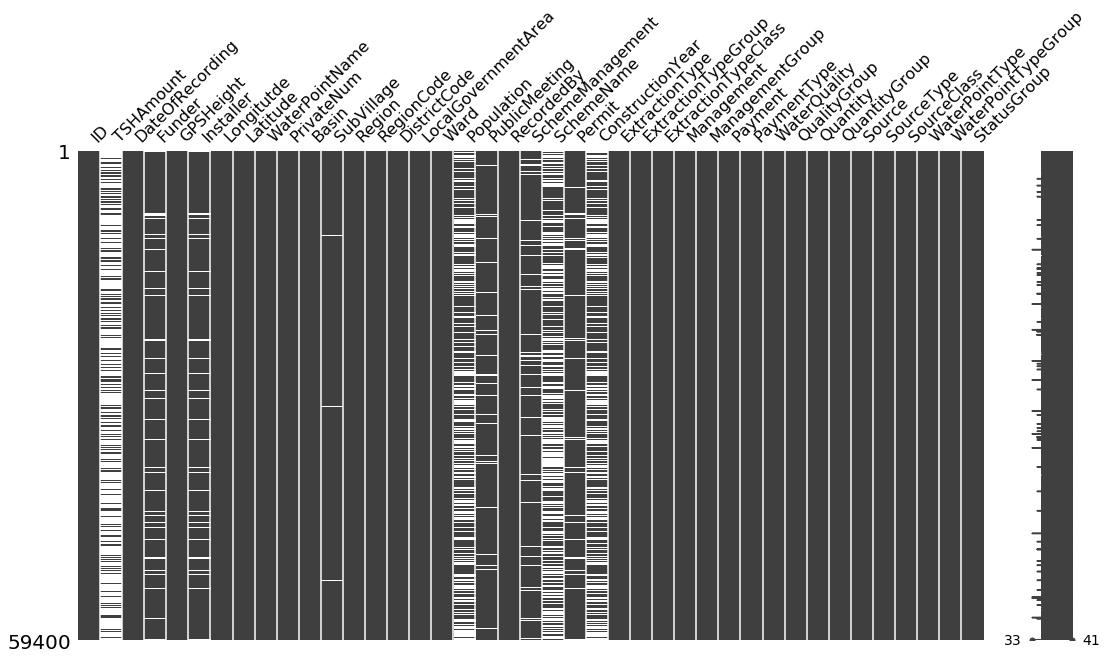

In [43]:
# Replacing 0.0 values with Numpy NaN values. 
data['TSHAmount'].replace(0.0, np.nan, inplace=True)
data['ConstructionYear'].replace(0.0, np.nan, inplace=True)
data['Population'].replace(0.0, np.nan, inplace=True)

# Graph of missing values in the features
missingno.matrix(data, figsize=(18,9))

In [44]:
# Checking the percentage of missing values in the features
nullValuePercent = round((data.isnull().sum()/data.shape[0])*100)
for index, value in nullValuePercent.items():
  if value > 30:
    print(f'{index}: {value}%')

TSHAmount: 70.0%
Population: 36.0%
SchemeName: 47.0%
ConstructionYear: 35.0%


In [45]:
# Check for column data types for easier grouping and data manipulation.
data.dtypes

ID                       int64
TSHAmount              float64
DateOfRecording         object
Funder                  object
GPSHeight                int64
Installer               object
Longitutde             float64
Latitude               float64
WaterPointName          object
PrivateNum               int64
Basin                   object
SubVillage              object
Region                  object
RegionCode               int64
DistrictCode             int64
LocalGovernmentArea     object
Ward                    object
Population             float64
PublicMeeting           object
RecordedBy              object
SchemeManagement        object
SchemeName              object
Permit                  object
ConstructionYear       float64
ExtractionType          object
ExtractionTypeGroup     object
ExtractionTypeClass     object
Management              object
ManagementGroup         object
Payment                 object
PaymentType             object
WaterQuality            object
QualityG

# Handling Missing Values

---

***It's possible that the variables might be useless so according to [this comment](https://community.drivendata.org/t/handling-missing-values/1051/2?u=jarmos) in the discussion thread [Handling Missing Values](https://community.drivendata.org/t/handling-missing-values/1051?u=jarmos), for tree-based algorithms it's possible to assign a unqiue value like `-999` to the `NaN` values. As such I'll need to research further on how missing values are usually handled.***

- `TSHAmount` seems to have the highest `NaN` values with 70% missing. So I might've to drop them based on the discussion in the thread [Interpreting `amount_tsh`](https://community.drivendata.org/t/interpreting-amount-tsh/338?u=jarmos). Although it might be possible to impute values to them by feature engineering other variables like `WaterPointType`.
- The `Population` variable is missing 36% values which isn't much & it might be possible to impute them. Will need further clarification and information from the dicussion forums.
- `SchemeName` has almost half of the values missing and doesn't seem to be very valuable. I might drop the feature accordingly at a later point of time after referring to the discussions threads.
- Although the `ConstructionYear` variable has 35% of the values missing, I might drop it too but can't say anything yet as of now.

## Resources

- [How to Handle Missing Data | Medium](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
- [6 Methods for Dealing With Missing Data](https://www.zest.ai/blog/6-methods-for-dealing-with-missing-data) ***Good Read***
- [Handling Missing Values | Kaggle Machine Learning Tutorial](https://www.kaggle.com/dansbecker/handling-missing-values) 
- [5 Ways to Handle Missing Values in Machine Learning Datasets](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/) ***Informative***
- [6 Different Ways to Compensate for Missing Values in a Dataset](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) ***Recommended***

# Rough Overview

---

- The column names have been cleaned but there seems to be some duplicates which needs to be taken care of.
- `NaN` values in some of the features need to be taken care of too or dropped at a later stage after understanding the need to.
- Seems like there are a lot of string-type values in the dataset which could be transformed into possible categories.
- Understand & read up more on Feature Engineering.
- Do some feature engineering with the data, learn how to check for relevancy in the features and drop some columns accordingly.
- Create and run the dataset through an algorithm such as **XGBoost**, **Random Forest** & **K-Nearest Neighbours** since they can handle missing values to an extent.
- Create model and then **Profit**!!